<a href="https://colab.research.google.com/github/lengerfulluse/mynux.cn/blob/master/fix_vanishing_gradients_with_ReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

We can create a graph of the dataset, plotting the x and y coordinates of the input variables (X) and coloring each point by the class value (0 or 1).



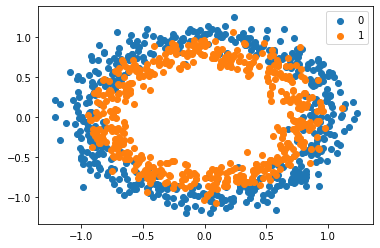

In [3]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

Normally, we would prepare the data scaling using a training dataset and apply it to a test dataset. To keep things simple in this tutorial, we will scale all of the data together before splitting it into train and test sets.

In [0]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

Half of the data will be used for training and the remaining 500 examples will be used as the test set. In this tutorial, the test set will also serve as the validation dataset so we can get an idea of how the model performs on the holdout set during training.

In [0]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

The model will have an input layer with two inputs, for the two variables in the dataset, one hidden layer with five nodes, and an output layer with one node used to predict the class probability. The hidden layer will use the hyperbolic tangent activation function (tanh) and the output layer will use the logistic activation function (sigmoid) to predict class 0 or class 1 or something in between.

Using the hyperbolic tangent activation function in hidden layers was the best practice in the 1990s and 2000s, performing generally better than the logistic function when used in the hidden layer. It was also good practice to initialize the network weights to small random values from a uniform distribution. Here, we will initialize weights randomly from the range [0.0, 1.0].

In [0]:
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

The model uses the binary cross entropy loss function and is optimized using stochastic gradient descent with a learning rate of 0.01 and a large momentum of 0.9.

In [0]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

The model is trained for 500 training epochs and the test dataset is evaluated at the end of each epoch along with the training dataset.

In [11]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
print(history)

In [14]:
print(history.history['val_acc'])

{'val_loss': [0.43011984848976137, 0.43057198119163514, 0.4280322415828705, 0.43002967882156373, 0.42999601340293886, 0.42833558106422426, 0.4280111365318298, 0.427346540927887, 0.4294126896858215, 0.42761437368392946, 0.4272139525413513, 0.4276174664497375, 0.4273353867530823, 0.42779114508628846, 0.4270653684139252, 0.4268846626281738, 0.42732132697105407, 0.4263404998779297, 0.42593969345092775, 0.42772060775756837, 0.42561402106285096, 0.4254393789768219, 0.4254589424133301, 0.4241148390769959, 0.42556182432174683, 0.426117116689682, 0.4252186465263367, 0.4242524378299713, 0.424337553024292, 0.42432182145118713, 0.42319016122817993, 0.4241304888725281, 0.42358189940452573, 0.4240081079006195, 0.4229042341709137, 0.4245725827217102, 0.4239231297969818, 0.4230211102962494, 0.42267962265014647, 0.4224630720615387, 0.4229019567966461, 0.42357458305358886, 0.4218672480583191, 0.4212719476222992, 0.42271635389328005, 0.42125189423561094, 0.42141840696334837, 0.4231243495941162, 0.4221935

After the model is fit, it is evaluated on both the train and test dataset and the accuracy scores are displayed.

In [15]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.834, Test: 0.842


Finally, the accuracy of the model during each step of training is graphed as a line plot, showing the dynamics of the model as it learned the problem.

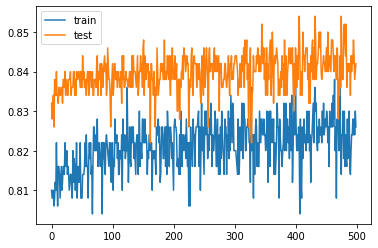

In [19]:
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

The complete example of the deeper MLP is listed below.



Train: 0.514, Test: 0.484


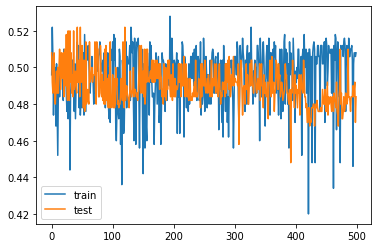

In [27]:
# deeper mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
for i in range(5):
  model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### Deeper MLP Model with ReLU for Two Circles Problem

When using the rectified linear activation function (or ReLU for short), it is good practice to use the He weight initialization scheme. We can define the MLP with five hidden layers using ReLU and He initialization, listed below.

Train: 0.828, Test: 0.840


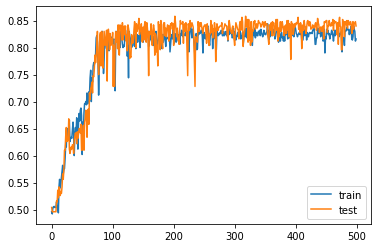

In [26]:
# deeper mlp with relu for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))

for i in range(10):
  model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()